In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import List

from synchronous_gossip_protocol.node import Node, NodeType, State, state_transition

sns.set_theme()

In [2]:
# Simulation parameters
n = 100
s = 40
f = 10
C = 40
T = 50
K = 5

is_adversarial_node = random.sample(range(n), 10)
is_sample_node = random.sample(range(n), s)

# Create nodes
nodes = []
for node_id in range(n):
    if node_id in is_adversarial_node:
        if node_id in is_sample_node:
            node_type = NodeType.SAMPLE_ADVERSARIAL
        else:
            node_type = NodeType.ADVERSARIAL
    else:
        if node_id in is_sample_node:
            node_type = NodeType.SAMPLE_NORMAL
        else:
            node_type = NodeType.NORMAL

    nodes.append(Node(node_id=node_id, node_type=node_type, storage_capacity=C))


state = State(nodes, time_step=0, num_neighbors=K)
for t in range(1, T):
    state = state_transition(state)

storages = []
for node in state.nodes:
    storages.append(node.storage)

df = pd.DataFrame(storages)

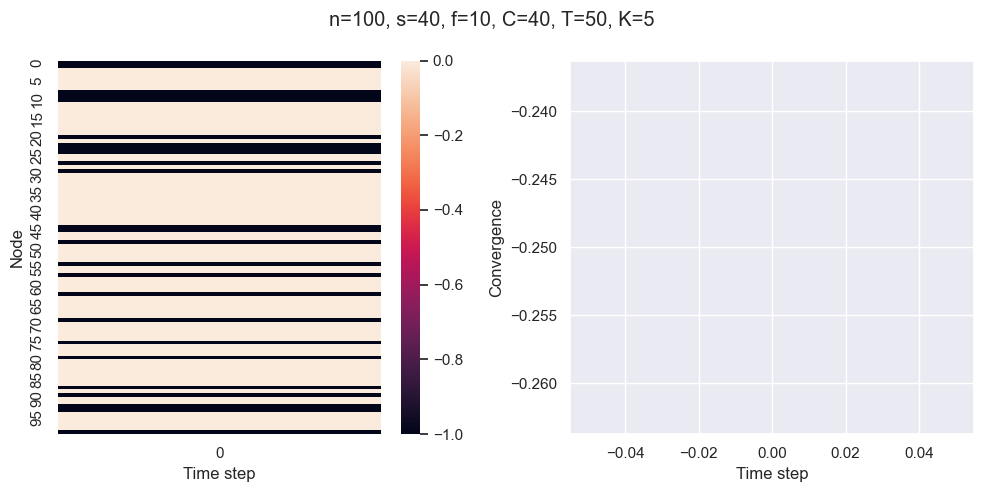

In [3]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10, 5))

sns.heatmap(df, ax=ax)
ax.set_xlabel("Time step")
ax.set_ylabel("Node")

sns.lineplot(df.mean(axis=0), ax=ax1)
ax1.set_xlabel("Time step")
ax1.set_ylabel("Convergence")

fig.suptitle(f"{n=}, {s=}, {f=}, {C=}, {T=}, {K=}")

fig.tight_layout()

# Synchronous Randomized Gossip Protocol Design

## High level overview

Periodically, each participant randomly selects a peer and exchanges state. This state is reconciled in a way so that all non- faulty participants eventually converge to the same state. It can be shown that this approach is efficient, converging in O(logN) gossip rounds where N is the number of participants, even in the face of participants failures and message loss [1]

A synchronous gossip protocol is a type of communication protocol used in distributed systems to achieve information dissemination and synchronization among nodes. In a gossip protocol, nodes exchange information with each other in a decentralized manner, mimicking how rumors or gossip spreads among individuals in a social network.

The term "synchronous" in synchronous gossip protocol refers to the fact that there is a fixed, known time frame or discrete steps during which information exchange and propagation occur. In other words, all participating nodes perform communication and computation steps in a synchronized manner, often progressing through rounds or phases.

The steps broadly are:

1. **Initialization:** Each node starts with a piece of information it wants to share or propagate to the network.

2. **Communication and Gossiping:** In each round or step, nodes select a subset of neighbors to exchange information with. They share their information and receive information from others. This process mimics how people in a social network share rumors.

3. **Updating Information:** Nodes may update their local information based on the information received from neighbors. This helps in achieving synchronization and consistency across the network.

4. **Repetition:** The communication and gossiping steps are repeated for a fixed number of rounds or until a certain convergence criteria are met. This repetition ensures that information spreads across the network and that nodes eventually have consistent information.

Synchronous gossip protocols are used in various distributed systems scenarios, such as in peer-to-peer networks, data replication in databases, and consensus algorithms like Paxos and Raft. However, they may face challenges related to scalability, fault tolerance, and latency, especially in larger networks or networks with high levels of churn (nodes joining and leaving frequently).

It's worth noting that there are also asynchronous gossip protocols, where nodes do not follow a strict synchronized pattern and communication happens without a fixed schedule. These protocols tend to be more flexible but can be harder to analyze and reason about due to the lack of synchronization.

## Node Representation:

Define a class to represent a node. Each node should have the following attributes:

- Node ID (cryptographic identity)
- Storage (capacity limited to $C$ data)
- Sample nodes with a defined fiducal state
- Defined proportion of honest and adversarial nodes

## Sample Construction:

Choose $s$ nodes to be in the sample, following the adversarial fraction distribution.
Randomly select $s_{adv}$ adversarial nodes and $(s - s_{adv})$ non-adversarial nodes for the sample.

## Data Structure:

Define a structure to hold data with a source identifier and a value.


## State Transition Function:

Create a function $ST(S_t)$ that takes the current state $S_t$ and returns the state for the next time step $S_{t+1}$.

In each time step, each node should:

- Select up to K neighbors to interact with.
- For each neighbor, exchange data, verify signatures, and update its storage.
- Implement a function to verify digital signatures to ensure the authenticity of data.

## Simulation:

Create a simulation framework that initializes nodes, runs multiple time steps, and tracks the changes in state over time.

## Probability Analysis:

Analyze the probability that non-adversarial nodes have at least one datum from a non-adversarial source at time $t = T$.

## Storage and Communication Size Analysis:

Estimate the worst-case storage and communication sizes for nodes during a single time step and throughout the protocol execution.

## Testing:

Develop unit tests to verify the correctness of functions and interactions.
Implement end-to-end tests to simulate the protocol and validate its behavior.c

## References

- [1] Alan Demers, Dan Greene, Carl Houser, Wes Irish, John Larson, Scott Shenker, Howard Sturgis, Dan Swinehart, and Doug Terry. 1988. Epidemic algorithms for replicated database maintenance. SIGOPS Oper. Syst. Rev. 22, 1 (Jan., 1988), 8–32. https://doi.org/10.1145/43921.43922
- [2] Sandro Coretti, Aggelos Kiayias, Cristopher Moore, and Alexander Russell. 2022. The Generals' Scuttlebutt: Byzantine-Resilient Gossip Protocols. In Proceedings of the 2022 ACM SIGSAC Conference on Computer and Communications Security (CCS '22). Association for Computing Machinery, New York, NY, USA, 595–608. https://doi.org/10.1145/3548606.3560638
- [3] van den Berg, L., Gattinger, M. (2020). Dealing with Unreliable Agents in Dynamic Gossip. In: Martins, M.A., Sedlár, I. (eds) Dynamic Logic. New Trends and Applications. DaLi 2020. Lecture Notes in Computer Science(), vol 12569. Springer, Cham. https://doi.org/10.1007/978-3-030-65840-3_4
- [4] N. Loizou and P. Richtárik, "Revisiting Randomized Gossip Algorithms: General Framework, Convergence Rates and Novel Block and Accelerated Protocols," in IEEE Transactions on Information Theory, vol. 67, no. 12, pp. 8300-8324, Dec. 2021, doi: 10.1109/TIT.2021.3113285.
- [5] Gossip-based Protocols for Large-scale Distributed Systems. Márk Jelasity, 2013

## References key points
- [1] Foundations of Gossip protocols, Introduces concepts  like: anti entropy, rumor mongering, push/pull strategies, fanout
- 

# Parameters

| Parameter | Definition                                                         | Relation                    |
|-----------|--------------------------------------------------------------------|-----------------------------|
| n         | Total number of nodes in network                                   | $n_{hon} + n_{adv}$         |
| s         | Number of nodes in sample                                          | $s_{hon} + s_{adv}$         |
| f         | Fraction of adversarial nodes in sample                            | $Pr(s_{adv}) = (1 - p) p^k$ |
| C         | Total storage capacity per node                                    | -                           |
| T         | Final time step                                                    | -                           |
| ε         | Probability of all honest nodes holding ≥ 1 honest datum at time T | $1 - \epsilon$              |
| K         | Number of nodes each node can gossip with                          | -                           |

Formal definitions:
$$ k \geq 0, \quad p = \frac{f_s}{f_s + 1} $$

$$ 1 - \epsilon = Pr(\forall C_{(n-f)} \exists \{c_j\}_i \text{ where } c_j \in C_{(s-sf)} \ \&\  i \geq 1) $$

# Define a Node Class

## Messaging strategies

- **Push strategy**: Nodes with new updates send them to other nodes (useful when few updates)

- **Pull strategy**: All nodes are actively pulling for updates (useful when large number of updates)

- **Push-Pull strategy**: It pushes when it has updates, and its pulling for new updates (combination strategy)


Heartbeat emmited by nodes to show liveness

In [ ]:
class Node:
    def __init__(
        self, 
        node_id: int, 
        is_adversarial: bool, 
        is_sample: bool, 
        storage_capacity: int
    ):
        self.node_id = node_id
        self.is_adversarial = is_adversarial
        self.is_sample = is_sample
        self.storage_capacity = storage_capacity
        self.storage = deque(maxlen=storage_capacity)
        if self.is_sample:
            self.storage.append(self.generate_data_for_round())

    def generate_data_for_round(self):
        data = {
            "source": self.node_id,
            "msg": f"Data from {self.node_id}",
            "signature": ""
        }
        data["signature"] = self.sign_data(data["msg"])
        return data
    
    def sign_data(self, data: str) -> str:
        # Simulate data signing using hash
        return hashlib.sha256(data.encode()).hexdigest()

    def verify_signature(self, msg: str, signature: str) -> bool:
        # Simulate signature verification
        return signature == self.sign_data(msg)

    def select_data_to_send(self) -> dict | None:
        # Select data to send to neighbors
        if self.storage:
            return self.storage[-1]
        else:
            return None

    def receive_data(self, data: dict | None) -> dict | None:
        # Simulate data exchange and signature verification
        if data and data not in self.storage and not self.is_adversarial and self.verify_signature(data["msg"], data["signature"]):
            return data
        return None

    def update_storage(self, data: dict, time_step: int):
        self.storage.append(data)

    def __repr__(self) -> str:
        return f"Node(id={self.node_id}, is_adv={self.is_adversarial}, is_sam={self.is_sample})"


def state_transition(node: Node, neighbors: List[Node], time_step: int):
    data_to_send = node.select_data_to_send()

    for neighbor in neighbors:
        received_data = neighbor.receive_data(data_to_send)
        if received_data:
            neighbor.update_storage(received_data, time_step)


# Simulation parameters
n = 3
s = 2
f = 0.3
C = 5
T = 5
K = 2

is_adversarial_node = random.sample(range(n), int(f * n))
is_sample_node = random.sample(range(n), s)

# Create nodes
nodes = []
for node_id in range(n):
    is_adversarial = True if node_id in is_adversarial_node else False
    is_sample = True if node_id in is_sample_node else False
    nodes.append(Node(node_id, is_adversarial, is_sample, C))
# s = State(nodes, time_step=0)

# Simulation
for t in range(1, T):
    print(f"\nTimestep {t}\n{'-' * 50}")

    print("Before ST")
    for node in nodes:
        print(node.node_id, [data['msg'] for data in node.storage])
        pass

    print("During ST")
    for node in nodes:
        neighbours = [neighbour for neighbour in nodes if neighbour != node]
        neighbours = random.sample(neighbours, K)  # Randomly select neighbors
        # print(node)
        # print("neighbours =", neighbors)
        state_transition(node, neighbours, t)
        print(f"{node.node_id} -> {[neighbour.node_id for neighbour in neighbours]}")

    print("After ST")
    for node in nodes:
        print(node.node_id, [data['msg'] for data in node.storage])

In [ ]:
  
    for node in nodes:
        print(node)
        print([data['msg'] for data in node.storage])

# Define the State

In [ ]:
class State:
    def __init__(nodes: list[Nodes], time_step: int, num_neighbours: int):
        self.nodes = nodes
        self.time_step = time_step
        self.num_neighbours = num_neighbours

    def evolve_state(self)
        for node in self.nodes:
            data_to_send = node.select_data_to_send()

            neighbours = [neighbour for neighbour in self.nodes if neighbour != node]
            neighbours = random.sample(neighbours, self.num_neighbours)
            
            for neighbour in neighbours:
                received_data = neighbour.receive_data(data_to_send)
                if received_data:
                    neighbour.update_storage(received_data, time_step)   